Los modelos ingenuos de Bayes son un grupo de algoritmos de clasificación extremadamente rápidos y simples que a menudo son adecuados para conjuntos de datos de muy alta dimensión.
Debido a que son tan rápidos y tienen tan pocos parámetros ajustables, terminan siendo muy útiles como una línea de base rápida y sucia para un problema de clasificación.
Esta sección se centrará en una explicación intuitiva de cómo funcionan los clasificadores ingenuos de Bayes, seguidos de un par de ejemplos de ellos en acción en algunos conjuntos de datos.

## Clasificación Bayesiana

Los clasificadores ingenuos de Bayes se basan en métodos de clasificación bayesianos.
Estos se basan en el teorema de Bayes, que es una ecuación que describe la relación de las probabilidades condicionales de las cantidades estadísticas.
En la clasificación bayesiana, estamos interesados en encontrar la probabilidad de una etiqueta dadas algunas características observadas, que podemos escribir como $ P (L ~ | ~ {\rm features}) $.
El teorema de Bayes nos dice cómo expresar esto en términos de cantidades que podemos calcular más directamente:

$$
P (L ~ | ~ {\rm features}) = \frac {P ({\rm features} ~ | ~ L) P (L)} {P ({\rm features})}
$$

Si estamos tratando de decidir entre dos etiquetas, llamémoslas $ L_1 $ y $ L_2 $, entonces una forma de tomar esta decisión es calcular la razón de las probabilidades posteriores para cada etiqueta:

$$
\frac {P (L_1 ~ | ~ {\rm features})} {P (L_2 ~ | ~ {\rm features})} = \frac {P ({\rm features} ~ | ~ L_1)} {P ( {\rm características} ~ | ~ L_2)} \frac {P (L_1)} {P (L_2)}
$$

Todo lo que necesitamos ahora es algún modelo mediante el cual podamos calcular $ P ({\rm features} ~ | ~ L_i) $ para cada etiqueta.
Tal modelo se llama * modelo generativo * porque especifica el hipotético proceso aleatorio que genera los datos.
La especificación de este modelo generativo para cada etiqueta es la pieza principal del entrenamiento de un clasificador bayesiano.
La versión general de tal paso de capacitación es una tarea muy difícil, pero podemos simplificarla mediante el uso de algunos supuestos simplificadores sobre la forma de este modelo.

Aquí es donde entra lo "ingenuo" en "ingenuo Bayes": si hacemos suposiciones muy ingenuas sobre el modelo generativo para cada etiqueta, podemos encontrar una aproximación aproximada del modelo generativo para cada clase, y luego proceder con la clasificación bayesiana .
Los diferentes tipos de clasificadores ingenuos de Bayes se basan en diferentes suposiciones ingenuas sobre los datos, y examinaremos algunos de estos en las siguientes secciones.

Comenzamos con las importaciones estándar:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Bayes ingenuos gaussianos

Quizás el clasificador Bayes ingenuo más fácil de entender es el Bayes ingenuo gaussiano.
En este clasificador, la suposición es que *los datos de cada etiqueta se extraen de una distribución gaussiana simple*.
Imagine que tiene los siguientes datos:

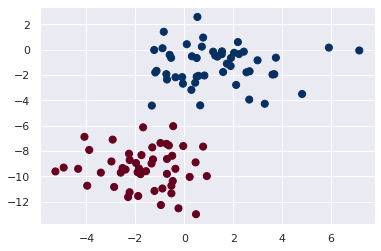

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

Una forma extremadamente rápida de crear un modelo simple es asumir que los datos se describen mediante una distribución gaussiana sin covarianza entre dimensiones.
Este modelo puede ajustarse simplemente encontrando la media y la desviación estándar de los puntos dentro de cada etiqueta, que es todo lo que necesita para definir dicha distribución.
El resultado de esta ingenua suposición gaussiana se muestra en la siguiente figura:

![(run code in Appendix to generate image)](figures/05.05-gaussian-NB.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Gaussian-Naive-Bayes)

Las elipses aquí representan el modelo generativo gaussiano para cada etiqueta, con mayor probabilidad hacia el centro de las elipses.
Con este modelo generativo para cada clase, tenemos una receta simple para calcular la probabilidad $ P ({\rm features} ~ | ~ L_1) $ para cualquier punto de datos, y así podemos calcular rápidamente la relación posterior y determinar qué La etiqueta es la más probable para un punto dado.

Este procedimiento se implementa en el estimador `` sklearn.naive_bayes.GaussianNB`` de Scikit-Learn:

In [7]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Ahora podemos trazar estos nuevos datos para tener una idea de dónde está el límite de decisión:

In [8]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Vemos un límite ligeramente curvado en las clasificaciones; en general, el límite en Bayes ingenuo gaussiano es cuadrático.

Una buena parte de este formalismo bayesiano es que, naturalmente, permite la clasificación probabilística, que podemos calcular utilizando el método `` predic_proba``:

In [9]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

Las columnas dan las probabilidades posteriores de la primera y segunda etiqueta, respectivamente.
Si está buscando estimaciones de incertidumbre en su clasificación, los enfoques bayesianos como este pueden ser un enfoque útil.

Por supuesto, la clasificación final solo será tan buena como los supuestos del modelo que la conducen, por lo que Bayes ingenuo gaussiano a menudo no produce muy buenos resultados.
Aún así, en muchos casos, especialmente a medida que aumenta el número de características, esta suposición no es lo suficientemente perjudicial como para evitar que Bayes ingenuo gaussiano sea un método útil.

## Bayes ingenuo multinomial

La suposición gaussiana que se acaba de describir no es la única suposición simple que podría usarse para especificar la distribución generativa de cada etiqueta.
Otro ejemplo útil es Bayes ingenuo multinomial, donde se supone que las características se generan a partir de una distribución multinomial simple.
La distribución multinomial describe la probabilidad de observar recuentos entre varias categorías y, por lo tanto, Bayes ingenuo multinomial es más apropiado para las características que representan recuentos o tasas de recuento.

La idea es exactamente la misma que antes, excepto que en lugar de modelar la distribución de datos con el gaussiano de mejor ajuste, modelamos la distribución de datos con una distribución multinomial de mejor ajuste.

### Ejemplo: clasificación de texto

Un lugar donde a menudo se usa Bayes ingenuo multinomial es en la clasificación de texto, donde las características están relacionadas con el recuento de palabras o las frecuencias dentro de los documentos que se clasificarán.
Discutimos la extracción de tales características del texto en [Feature Engineering] (05.04-Feature-Engineering.ipynb); Aquí utilizaremos las funciones de recuento de palabras dispersas del corpus de 20 grupos de noticias para mostrar cómo podemos clasificar estos documentos cortos en categorías.


Descarguemos los datos y echemos un vistazo a los nombres de destino:

In [10]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Para simplificar aquí, seleccionaremos solo algunas de estas categorías y descargaremos el conjunto de capacitación y pruebas:  

In [11]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Aquí hay una entrada representativa de los datos:

In [15]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



Para utilizar estos datos para el aprendizaje automático, necesitamos poder convertir el contenido de cada cadena en un vector de números.
Para esto, utilizaremos el vectorizador TF-IDF.

###  Ejemplo: clasificación de texto
Otra necesidad común en la ingeniería de características es convertir texto a un conjunto de valores numéricos representativos. Por ejemplo, la mayoría de la extracción automática de datos de redes sociales se basa en alguna forma de codificar el texto como números. Uno de los métodos más simples para codificar datos es por recuento de palabras: toma cada fragmento de texto, cuenta las apariciones de cada palabra dentro de él y coloca los resultados en una tabla.

Por ejemplo, considere el siguiente conjunto de tres frases:

In [20]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

Para una vectorización de estos datos basada en el recuento de palabras, podríamos construir una columna que represente la palabra "problema", la palabra "maldad", la palabra "horizonte", y así sucesivamente. Si bien esto sería posible a mano, se puede evitar el tedio utilizando el CountVectorizer de Scikit-Learn:

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

El resultado es una matriz dispersa que registra el número de veces que aparece cada palabra; es más fácil inspeccionar si convertimos esto a un DataFrame con columnas etiquetadas:

In [19]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


Sin embargo, hay algunos problemas con este enfoque: el recuento de palabras sin formato conduce a características que ponen demasiado peso en las palabras que aparecen con mucha frecuencia, y esto puede ser subóptimo en algunos algoritmos de clasificación. Un enfoque para solucionar esto se conoce como término frecuencia de documento inversa de frecuencia (TF – IDF) que pondera los recuentos de palabras en función de la frecuencia con la que aparecen en los documentos. La sintaxis para calcular estas características es similar al ejemplo anterior:

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())


Con esta tubería, podemos aplicar el modelo a los datos de entrenamiento y predecir etiquetas para los datos de prueba:

In [24]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Ahora que hemos predicho las etiquetas para los datos de prueba, podemos evaluarlos para conocer el rendimiento del estimador.
Por ejemplo, aquí está la matriz de confusión entre las etiquetas verdaderas y predichas para los datos de prueba:

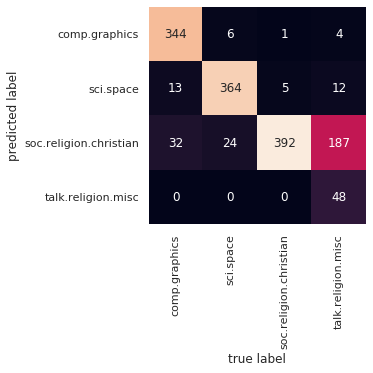

In [25]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidentemente, incluso este clasificador muy simple puede separar con éxito la conversación espacial de la computadora, pero se confunde entre hablar sobre religión y hablar sobre el cristianismo.
¡Esta es quizás un área esperada de confusión!

Lo genial aquí es que ahora tenemos las herramientas para determinar la categoría para *cualquier* cadena, usando el método `` predic () `` de esta tubería.
Aquí hay una función de utilidad rápida que devolverá la predicción para una sola cadena:

In [26]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [27]:
predict_category('sending a payload to the ISS')

'sci.space'

In [28]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [29]:
predict_category('determining the screen resolution')

'comp.graphics'


Recordemos que esto no es nada más sofisticado que un modelo de probabilidad simple para la frecuencia (ponderada) de cada palabra en la cadena; Sin embargo, el resultado es sorprendente.
Incluso un algoritmo muy ingenuo, cuando se usa con cuidado y se entrena en un gran conjunto de datos de alta dimensión, puede ser sorprendentemente efectivo.


## Cuándo usar Bayes ingenuo

Debido a que los ingenuos clasificadores bayesianos hacen suposiciones tan estrictas sobre los datos, generalmente no funcionarán tan bien como un modelo más complicado.
Dicho esto, tienen varias ventajas:

- Son extremadamente rápidos tanto para entrenamiento como para predicción
- Proporcionan predicciones probabilísticas sencillas
- A menudo son muy fáciles de interpretar.
- Tienen muy pocos (si los hay) parámetros ajustables

Estas ventajas significan que un ingenuo clasificador bayesiano suele ser una buena opción como clasificación inicial de referencia.
Si funciona adecuadamente, felicidades: tiene un clasificador muy rápido e interpretable para su problema.
Si no funciona bien, puede comenzar a explorar modelos más sofisticados, con un conocimiento básico de qué tan bien deberían funcionar.

Los clasificadores ingenuos de Bayes tienden a funcionar especialmente bien en una de las siguientes situaciones:

- Cuando las suposiciones ingenuas realmente coinciden con los datos (muy raro en la práctica)
- Para categorías muy bien separadas, cuando la complejidad del modelo es menos importante
- Para datos de muy alta dimensión, cuando la complejidad del modelo es menos importante

Los últimos dos puntos parecen distintos, pero en realidad están relacionados: a medida que crece la dimensión de un conjunto de datos, es mucho menos probable que se encuentren dos puntos juntos (después de todo, deben estar cerca en *cada dimensión* para estar cerca en general).
Esto significa que los grupos en dimensiones altas tienden a estar más separados, en promedio, que los grupos en dimensiones bajas, suponiendo que las nuevas dimensiones realmente agreguen información.
Por esta razón, los clasificadores simplistas como los ingenuos Bayes tienden a funcionar tan bien o mejor que los clasificadores más complicados a medida que crece la dimensionalidad: una vez que tiene suficientes datos, incluso un modelo simple puede ser muy poderoso.